In [1]:
!pip install pandas-profiling

     -------------------------------------- 324.4/324.4 kB 2.9 MB/s eta 0:00:00
     -------------------------------------- 345.9/345.9 kB 5.4 MB/s eta 0:00:00
     -------------------------------------- 663.4/663.4 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 102.7/102.7 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 4.8 MB/s eta 0:00:00
     -------------------------------------- 296.5/296.5 kB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 5.6 MB/s eta 0:00:00
     ---------------------------------------- 40.1/40.1 MB 8.3 MB/s eta 0:00:00
     ---------------------------------------- 4.7/4.7 MB 9.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27092 sha256=472d2bf9ba1443ec393c7785bef079f973f1948f1652d0ccb8b399994ae51764
  Stored in directory: c:\users

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [21]:
#Read the CSV file and display the first few rows 
df = pd.read_csv('gold_monthly_csv.csv')
df.head()


,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [22]:
#Create a new dataframe with monthly dates as the index
date_range = pd.date_range(start='1/1/1950', end='8/1/2020', freq='M')
df['month'] = date_range
df.drop('Date', axis=1, inplace=True)
df = df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


<Figure size 2000x800 with 0 Axes>

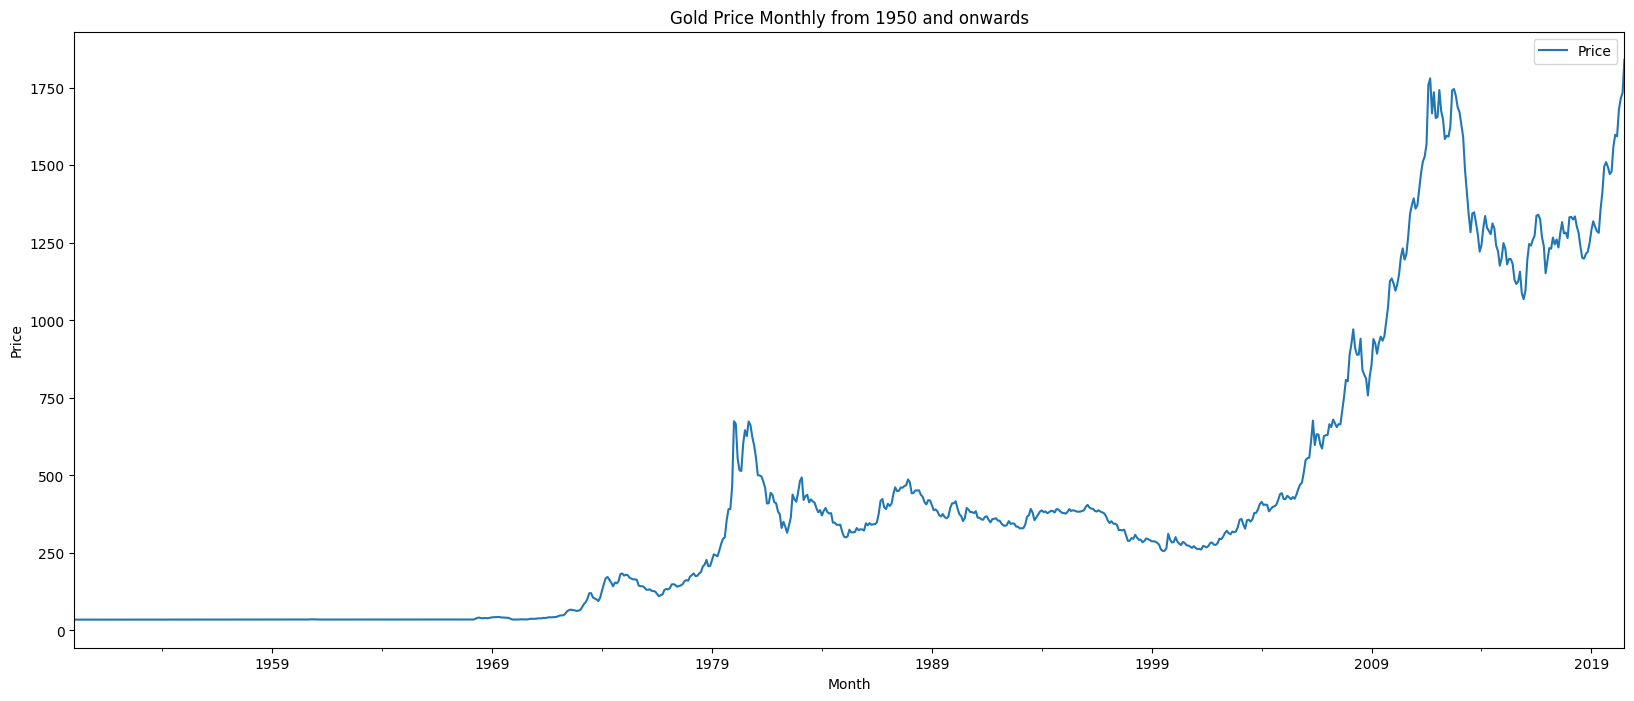

In [23]:
# Plot the gold prices over time
plt.figure(figsize=(20,8))
df.plot(figsize=(20,8))
plt.title('Gold Price Monthly from 1950 and onwards')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()


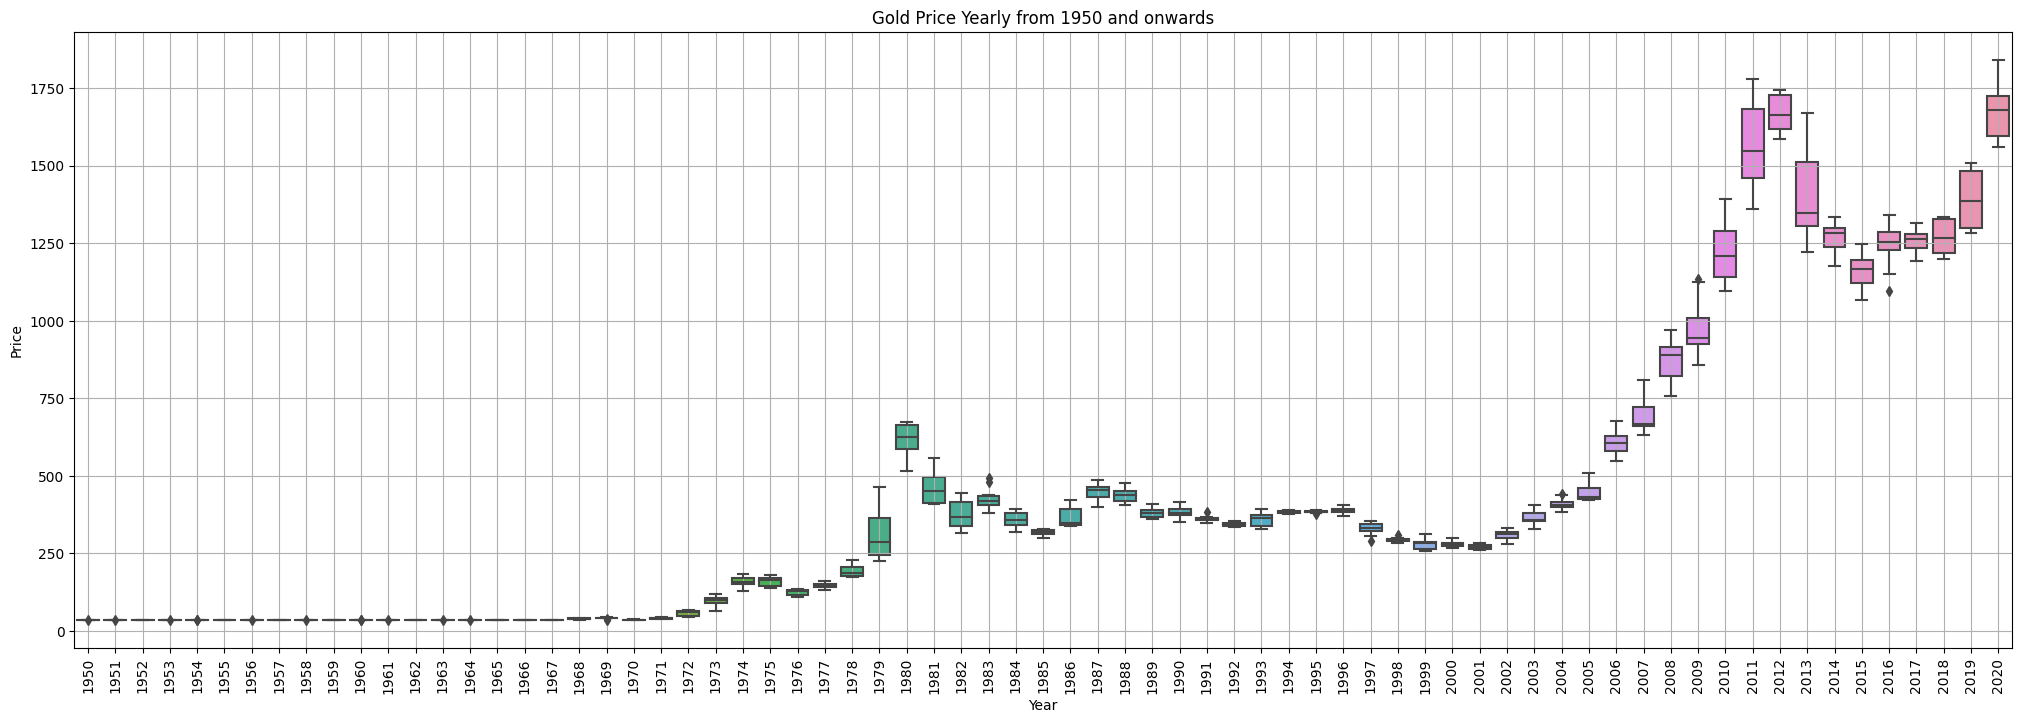

In [24]:
# Create a boxplot of the gold prices by year
plt.figure(figsize=(25,8))
sns.boxplot(x=df.index.year, y=df.values[:,0])
plt.title('Gold Price Yearly from 1950 and onwards')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [25]:
# Show summary statistics of the gold prices
print("Summary statistics of gold prices:\n", df.describe())

Summary statistics of gold prices:
              Price
count   847.000000
mean    416.556906
std     453.665313
min      34.490000
25%      35.190000
50%     319.622000
75%     447.029000
max    1840.807000


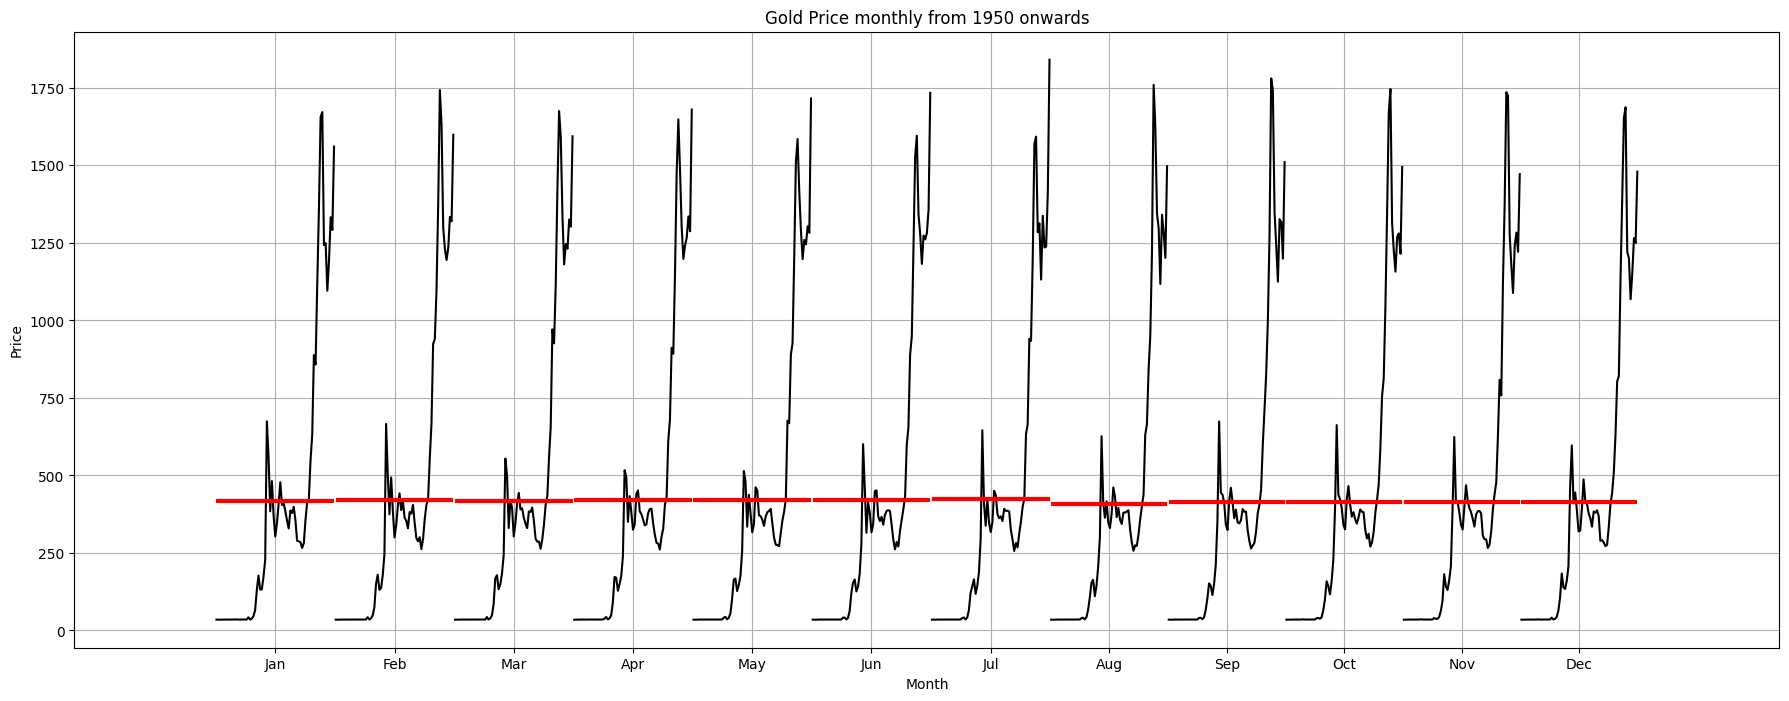

In [26]:
from statsmodels.graphics.tsaplots import month_plot
# Plot the gold prices by month
fig, ax = plt.subplots(figsize=(22,8))
month_plot(df, ylabel='Gold Price', ax=ax)
plt.title('Gold Price monthly from 1950 onwards')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid()
plt.show()

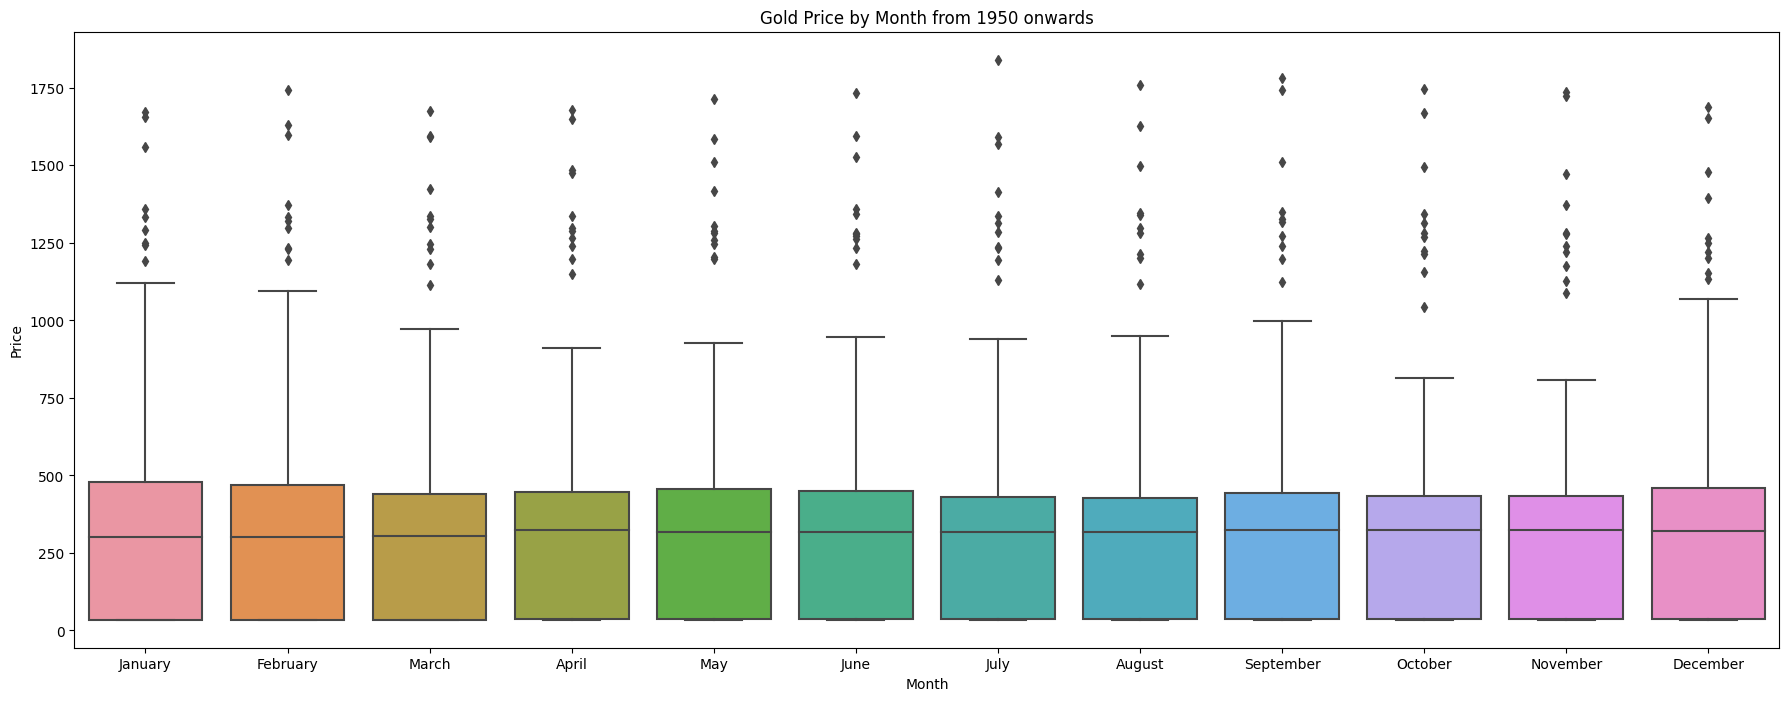

In [27]:
# Create a boxplot of the gold prices by month
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(), y=df.values[:,0], ax=ax)
plt.title('Gold Price by Month from 1950 onwards')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()


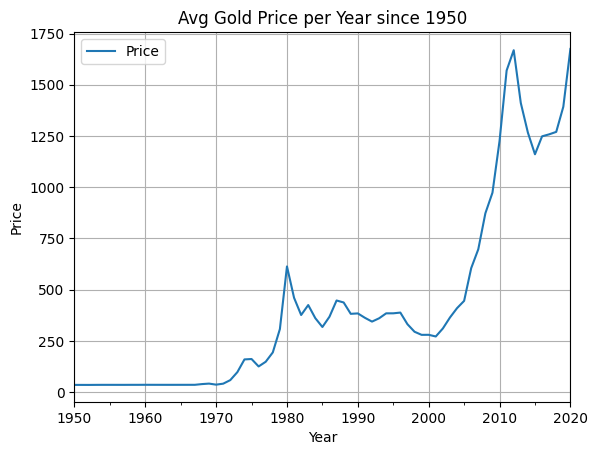

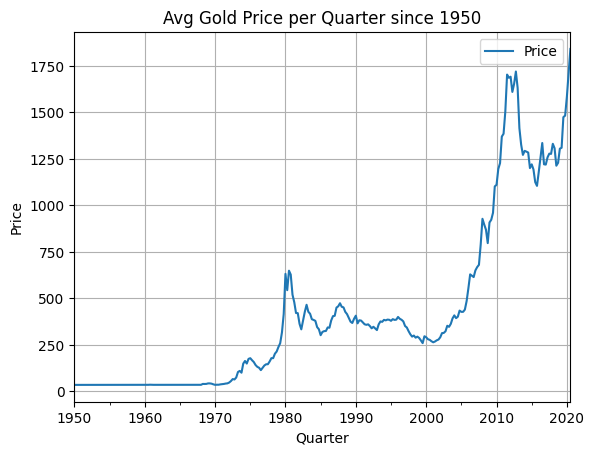

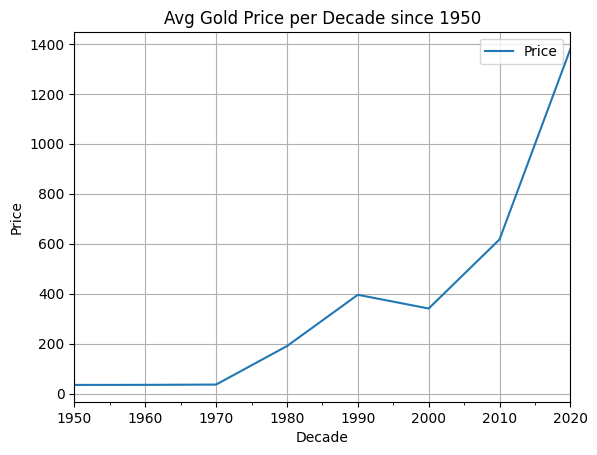

In [28]:
# Create yearly, quarterly, and decade summaries of the data
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot()
plt.title('Avg Gold Price per Year since 1950')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid()

df_quarterly_sum = df.resample('Q').mean()
df_quarterly_sum.plot()
plt.title('Avg Gold Price per Quarter since 1950')
plt.xlabel('Quarter')
plt.ylabel('Price')
plt.grid()

df_decade_sum = df.resample('10Y').mean()
df_decade_sum.plot()
plt.title('Avg Gold Price per Decade since 1950')
plt.xlabel('Decade')
plt.ylabel('Price')
plt.grid()



In [29]:
# Show summary statistics of the gold prices
print("Summary statistics of gold prices:\n", df.describe())

Summary statistics of gold prices:
              Price
count   847.000000
mean    416.556906
std     453.665313
min      34.490000
25%      35.190000
50%     319.622000
75%     447.029000
max    1840.807000


The first few rows of the coefficient of variation data:
            Mean       Std  Cov_pct
month                              
1950   34.729167  0.002887     0.01
1951   34.717500  0.020057     0.06
1952   34.628333  0.117538     0.34
1953   34.879167  0.056481     0.16
1954   35.020000  0.082792     0.24


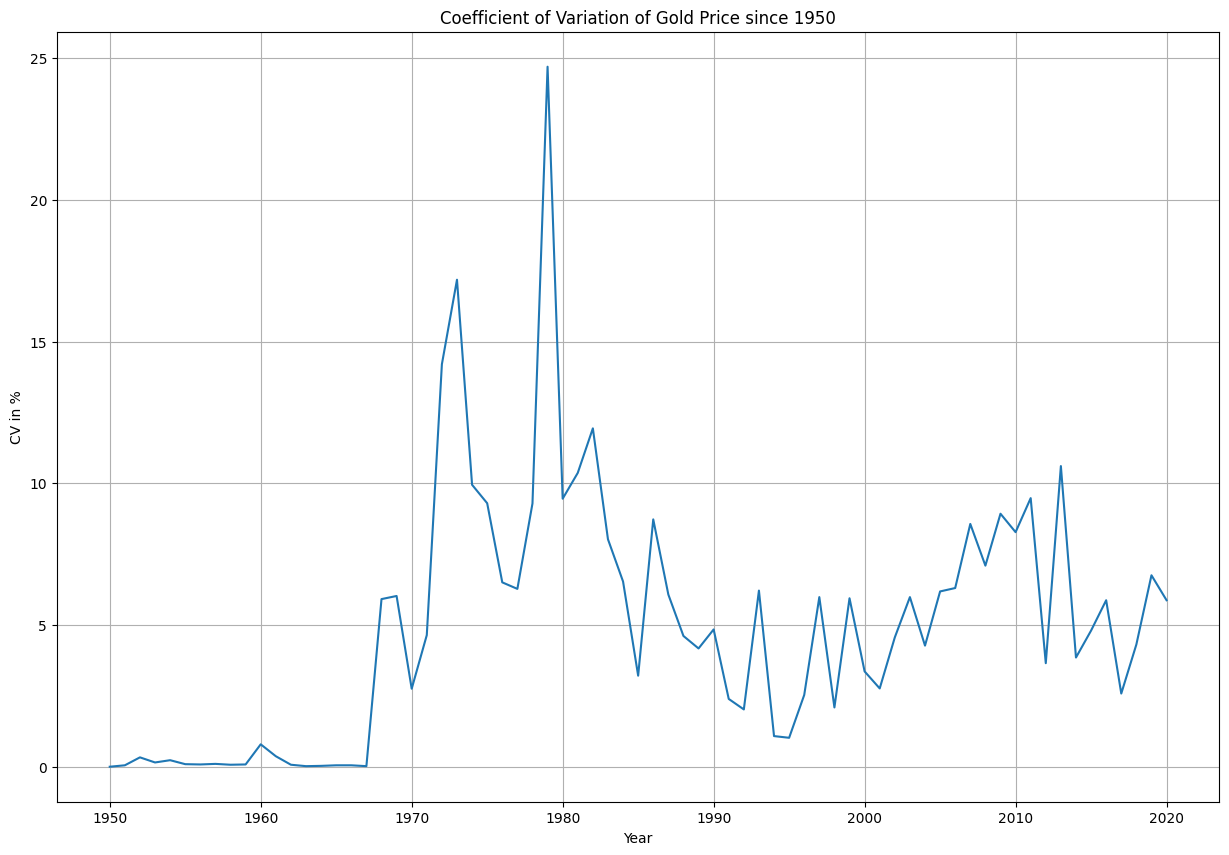

In [36]:
# Calculate the mean, standard deviation, and coefficient of variation (CV) for the data by year
df_1 = df.groupby(df.index.year).mean().rename(columns={'Price':'Mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns={'Price':'Std'}), left_index=True, right_index=True)
df_1['Cov_pct'] = ((df_1['Std'] / df_1['Mean']) * 100).round(2)

# Plot the CV over time
fig, ax = plt.subplots(figsize=(15, 10))
df_1['Cov_pct'].plot()
plt.title('Coefficient of Variation of Gold Price since 1950')
plt.xlabel('Year')
plt.ylabel('CV in %')
plt.grid()

# Display the first few rows of the data
print('The first few rows of the coefficient of variation data:')
print(df_1.head())


In [38]:
# Split the dataset into training and testing sets based on a cutoff year
train = df[df.index.year <= 2015]
test = df[df.index.year > 2015]

In [39]:
# Check the shape of the training and testing sets
print("Training set shape:", train.shape)

Training set shape: (792, 1)


In [40]:
print("Testing set shape:", test.shape)
# Checking for bias in the split
train_pct = len(train) / len(df) * 100
test_pct = len(test) / len(df) * 100
print("Percentage of data in training set:", round(train_pct, 2), '%')
print("Percentage of data in testing set:", round(test_pct, 2), '%')

Testing set shape: (55, 1)
Percentage of data in training set: 93.51 %
Percentage of data in testing set: 6.49 %


In [41]:
# It is not necessarily biased to split the data this way.
# However, it may depend on the specific problem and the goals of the analysis.
# It is always a good practice to carefully consider the split and to test different split ratios to evaluate their impact on the model performance.

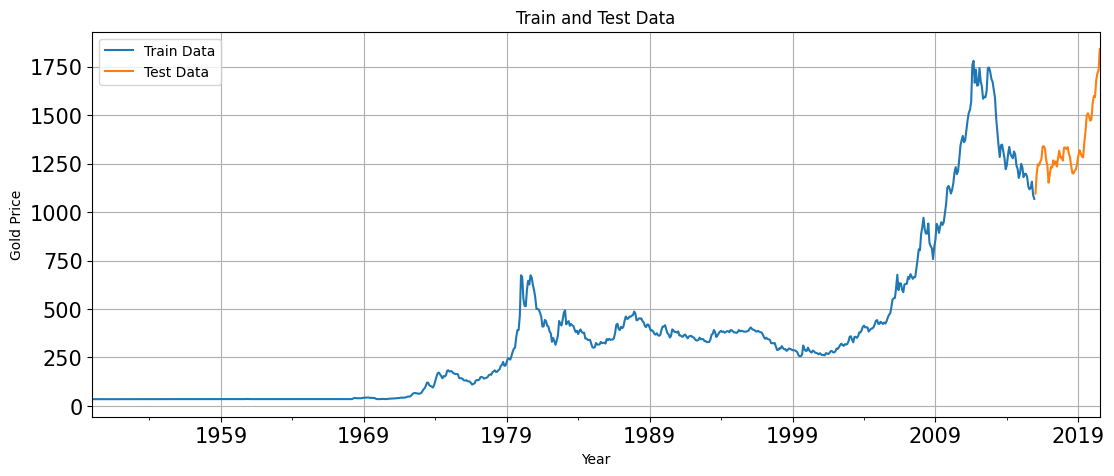

In [42]:
# Plot train and test data
train['Price'].plot(figsize=(13,5), fontsize=15)
test['Price'].plot(figsize=(13,5), fontsize=15)
plt.grid()
plt.legend(['Train Data', 'Test Data'])
plt.title('Train and Test Data')
plt.xlabel('Year')
plt.ylabel('Gold Price')
plt.show()

In [43]:
# Create time series for train and test data
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
print(f"Train time series length: {len(train_time)}")
print(f"Test time series length: {len(test_time)}")

Train time series length: 792
Test time series length: 55


In [44]:
# Add time series as a feature to train and test data
LR_train = train.copy()
LR_test = test.copy()
LR_train['time'] = train_time
LR_test['time'] = test_time

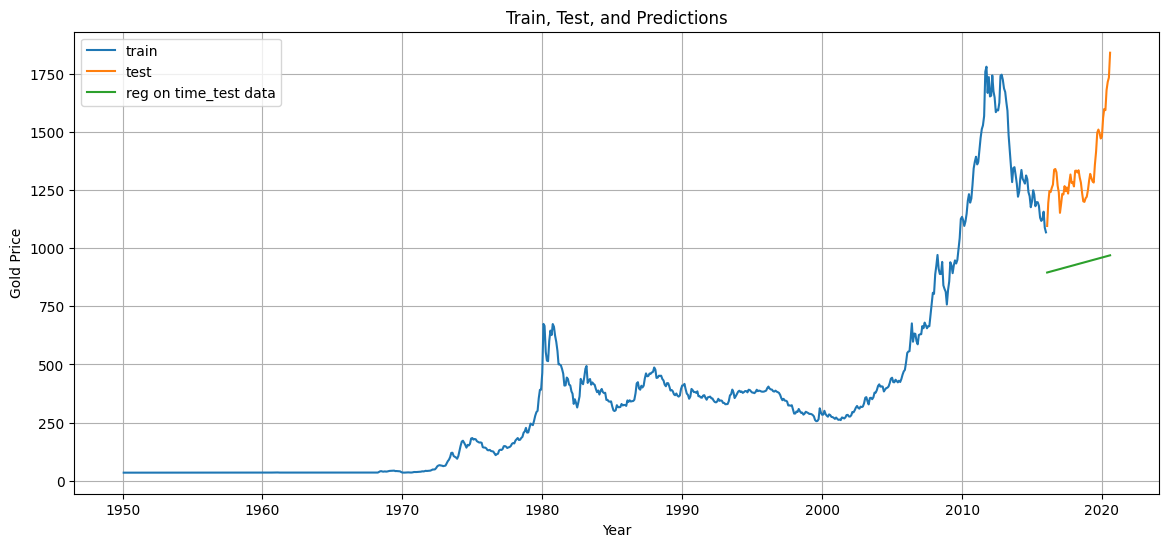

In [46]:
# Train a linear regression model on the train data using time as the independent variable
lr = LinearRegression()
lr.fit(LR_train[['time']], LR_train['Price'].values)
# Use the trained model to make predictions on the test data
test_predictions_model1 = lr.predict(LR_test[['time']])
LR_test['forecast'] = test_predictions_model1
# Plot the train data, test data, and predictions made by the linear regression model
plt.figure(figsize=(14,6))
plt.plot(train['Price'], label='train')
plt.plot(test['Price'], label='test')
plt.plot(LR_test['forecast'], label='reg on time_test data')
plt.legend(loc='best')
plt.grid()
plt.title('Train, Test, and Predictions')
plt.xlabel('Year')
plt.ylabel('Gold Price')
plt.show()


In [53]:
def mape(y_true, y_pred):
 """Calculate mean absolute percentage error (MAPE)"""
 y_true, y_pred = np.array(y_true), np.array(y_pred)
 return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_model1_test = mape(test['Price'].values, test_predictions_model1)
print(mape_model1_test)


29.75965844934857


In [54]:
# Create results dataframe to store MAPE values for different models
results = pd.DataFrame({'Test MAPE (%)': [mape_model1_test]},
index=['Regression on Time'])
results


,Test MAPE (%)
Regression on Time,29.759658


In [57]:
# Create naive model
naive_train = train.copy()
naive_test = test.copy()
naive_test['naive'] = np.repeat(train['Price'].iloc[-1], len(naive_test))
naive_test['naive'].head()


month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: naive, dtype: float64

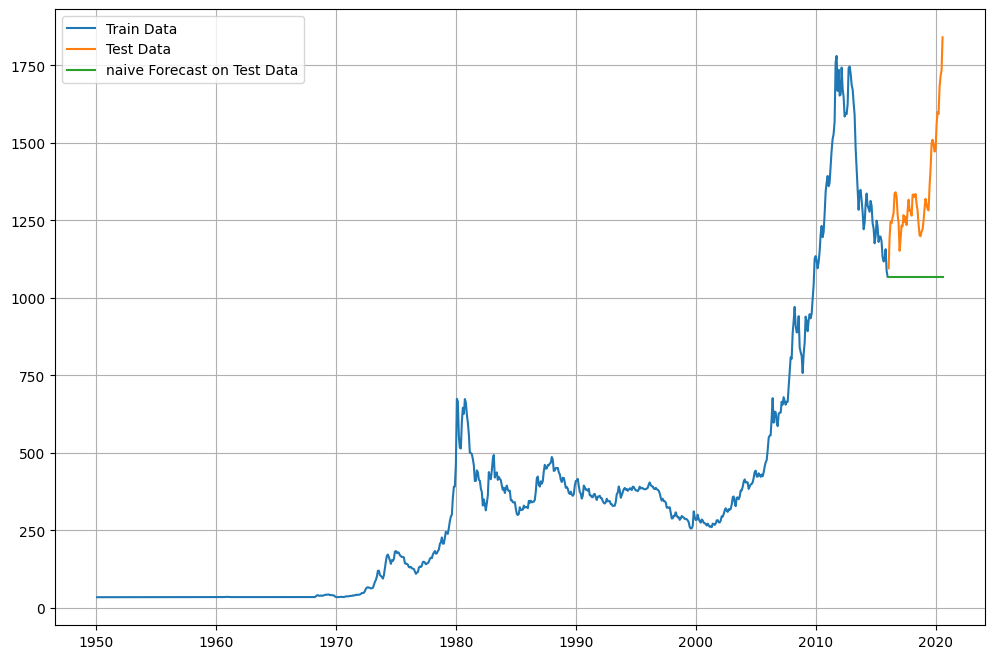

In [58]:
# Plot the train, test, and naive forecast on test data
plt.figure(figsize=(12,8))
plt.plot(naive_train['Price'], label='Train Data')
plt.plot(test['Price'], label='Test Data')
plt.plot(naive_test['naive'], label='naive Forecast on Test Data')
plt.legend(loc='best')
plt.grid()

In [59]:
# Calculate MAPE for naive forecast model
mape_model2_test = mape(test['Price'].values,
naive_test['naive'].values)
print('MAPE for naive Forecast model is %3.3f%%' % mape_model2_test)

MAPE for naive Forecast model is 19.385%


In [61]:
# Update the dataframe with the MAPE result for the naive forecast model
resultsDf_2 = pd.DataFrame({'Test MAPE (%)': [mape_model2_test]},
index=['naiveForecast'])
results = pd.concat([results,resultsDf_2])

# Display the dataframe with the MAPE results for both models
results


,Test MAPE (%)
Regression on Time,29.759658
naiveForecast,19.384586
naiveForecast,19.384586


In [62]:
# Perform exponential smoothing with additive trend and additive seasonality
final_model = ExponentialSmoothing(df, trend='additive',
seasonal='additive').fit(
 smoothing_level=0.4, smoothing_trend=0.3, smoothing_seasonal=0.6)

# Calculate mean absolute percentage error (MAPE) of the fitted values
mape_final_model = mape(df['Price'].values, final_model.fittedvalues)
print('MAPE of final model: %.3f%%' % mape_final_model)

MAPE of final model: 17.235%


In [63]:
# Generate forecast using the final model
prediction = final_model.forecast(steps=len(test))

# Create a dataframe to store the prediction and confidence intervals
pred_df = pd.DataFrame({
 'lower_CI': prediction - 1.96 * np.std(final_model.resid, ddof=1),
 'prediction': prediction,
 'upper_CI': prediction + 1.96 * np.std(final_model.resid, ddof=1)
})

In [64]:
# Export the predictions into a csv file.
pred_df.to_csv('gold_price_predictions.csv', index=True,
index_label='Month')
print('Prediction and confidence intervals:')
pred_df

Prediction and confidence intervals:


,lower_CI,prediction,upper_CI
2020-08-31,1684.716748,1792.867721,1901.018694
2020-09-30,1615.298179,1723.449152,1831.600125
2020-10-31,1538.554867,1646.705839,1754.856812
2020-11-30,1476.740491,1584.891463,1693.042436
2020-12-31,1459.304892,1567.455865,1675.606837
2021-01-31,1514.392181,1622.543154,1730.694127
2021-02-28,1545.325453,1653.476425,1761.627398
2021-03-31,1556.737321,1664.888294,1773.039267
2021-04-30,1648.283678,1756.434651,1864.585624
2021-05-31,1694.201073,1802.352046,1910.503019


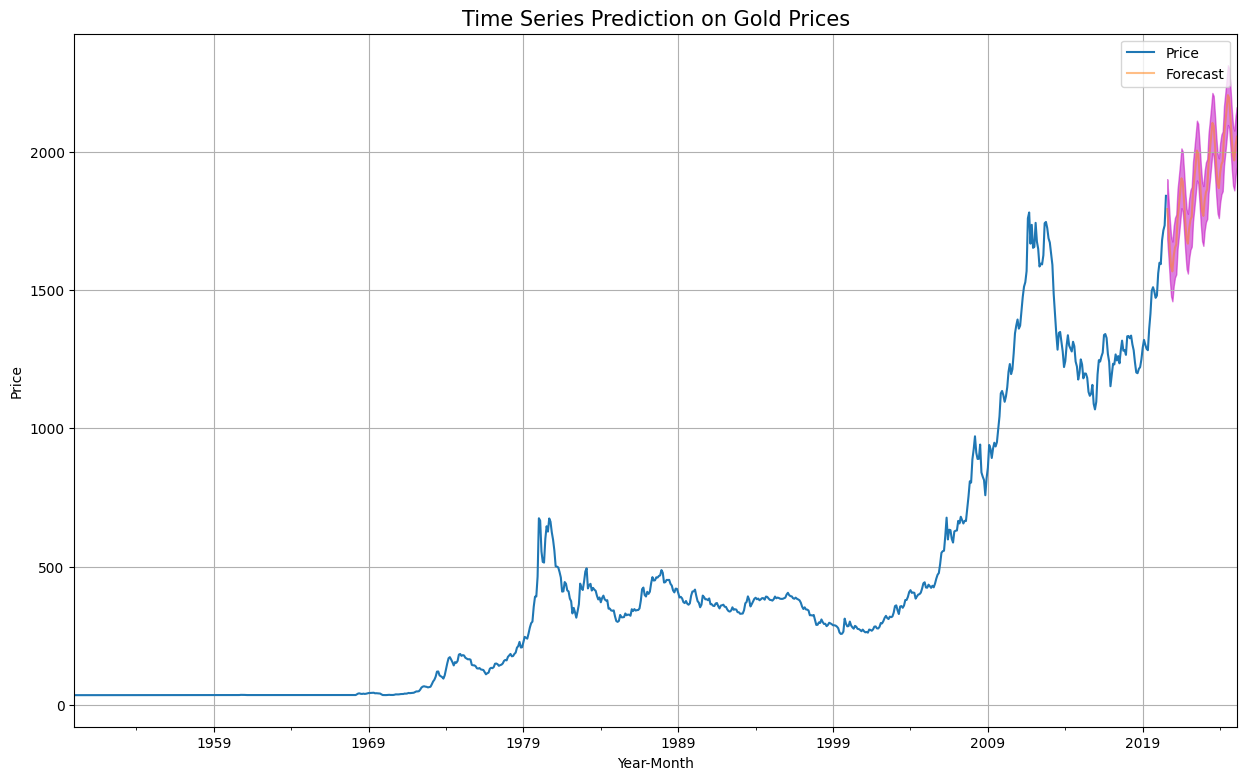

In [65]:
# Plot actual and predicted values with confidence intervals
axis = df.plot(label='Actual', figsize=(15,9))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'],
pred_df['upper_CI'], color='m', alpha=0.5)
axis.set_xlabel('Year-Month')
axis.set_ylabel('Price')
plt.title('Time Series Prediction on Gold Prices',fontsize=15)
plt.legend(loc='best')
plt.grid()
plt.show()
